In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
path="../final_internship_data.csv"

In [41]:
data=pd.read_csv(path)

In [42]:
# Costing Features
data=data.drop(['User ID', 'User Name', 'Driver Name'],axis=1)

In [43]:
data=data.drop(['key','pickup_datetime'],axis=1)

In [44]:
data = data[data['fare_amount'] > 0]

In [45]:
data=data.dropna()

In [46]:
#because it can't be calculating fare without passengers in the taxi
data=(data[data['passenger_count']!=0])

In [47]:
data=data.reset_index(drop=True)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [17]:
print(data.columns)

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [49]:
col={
    'Bad': 0,
    'Good': 1,
    'Very Good': 2,
    'Excellent': 3,
}
data.replace(col,inplace=True)

C:\Users\Seif Yasser\AppData\Local\Temp\ipykernel_11552\3448981916.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(col,inplace=True)


In [50]:
col={
    'sunny': 0,
    'cloudy': 1,
    'rainy': 2,
    'stormy': 3,
    'windy': 4
}
data.replace(col,inplace=True)

C:\Users\Seif Yasser\AppData\Local\Temp\ipykernel_11552\2425803721.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(col,inplace=True)


In [51]:
data = pd.get_dummies(data, columns=['Traffic Condition'])

In [71]:
data['fare_amount'] = data['fare_amount'].round().astype(int)

In [52]:
for column in data.columns:
  upp=data[column].mean()+3*data[column].std()
  low=data[column].mean()-3*data[column].std()
  data=data.loc[((data[column]<upp) &(data[column]>low))]

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:

k_best = SelectKBest(score_func=f_classif, k=10)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

distance: 28417.56
pickup_longitude: 1086.30
dropoff_longitude: 966.28
jfk_dist: 908.21
ewr_dist: 784.29
lga_dist: 782.11
year: 544.57
nyc_dist: 464.77
sol_dist: 422.96
dropoff_latitude: 188.39


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

print("Original data:")
print(data)

# Fit scaler to the data and transform the data
data = scaler.fit_transform(data)

print("\nNormalized data:")
print(data)

Original data:
        Car Condition  Weather  fare_amount  pickup_longitude  \
1                   3        1         16.9         -1.291824   
2                   0        3          5.7         -1.291242   
3                   2        3          7.7         -1.291319   
4                   0        3          5.3         -1.290987   
5                   3        0         12.1         -1.291560   
...               ...      ...          ...               ...   
498163              2        4         13.0         -1.291337   
498164              0        2          7.0         -1.291173   
498165              2        2         13.7         -1.291595   
498166              0        2         25.0         -1.291262   
498168              2        0          4.9         -1.291312   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
1              0.710546          -1.291182          0.711780                1   
2              0.711418          -1.291391

In [54]:
data=pd.DataFrame(data,columns=['Car Condition', 'Weather', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing','Traffic Condition_Congested Traffic','Traffic Condition_Dense Traffic','Traffic Condition_Flow Traffic'])

In [38]:
data

,Car Condition,Weather,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,...,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,1.000000,0.25,0.411049,0.293115,0.355015,0.440768,0.672085,0.00,0.695652,0.133333,...,0.607358,0.340130,0.669333,0.374346,0.362647,0.835162,0.440279,0.0,0.0,1.0
1,0.000000,0.75,0.138477,0.424728,0.580664,0.393630,0.532980,0.25,0.000000,0.566667,...,0.577169,0.415247,0.522069,0.469619,0.408279,0.137333,0.913796,1.0,0.0,0.0
2,0.666667,0.75,0.187150,0.407375,0.453644,0.392350,0.566294,0.00,0.173913,0.666667,...,0.550233,0.369060,0.576088,0.396840,0.318658,0.276664,0.521308,0.0,0.0,1.0
3,0.000000,0.75,0.128742,0.482585,0.611093,0.529788,0.679862,0.00,0.304348,0.266667,...,0.569615,0.642818,0.312548,0.690115,0.648787,0.197585,0.419988,1.0,0.0,0.0
4,1.000000,0.00,0.294232,0.352715,0.446811,0.465868,0.566918,0.00,0.391304,0.166667,...,0.541561,0.379795,0.557375,0.396919,0.316406,0.374309,0.392686,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442568,0.666667,1.00,0.316135,0.403248,0.522310,0.409370,0.481314,1.00,0.956522,0.766667,...,0.535583,0.369125,0.564466,0.386112,0.301206,0.104299,0.011831,1.0,0.0,0.0
442569,0.000000,0.50,0.170114,0.440387,0.605293,0.492716,0.568264,0.00,0.782609,0.200000,...,0.548044,0.529855,0.399955,0.567890,0.509979,0.138833,0.137804,0.0,1.0,0.0
442570,0.666667,0.50,0.333171,0.344939,0.387101,0.321982,0.357739,0.00,0.521739,0.400000,...,0.526869,0.180327,0.819616,0.134793,0.038220,0.098259,0.906948,0.0,0.0,1.0
442571,0.000000,0.50,0.608177,0.420196,0.419629,0.766671,0.313621,0.00,0.000000,0.800000,...,0.243748,0.624999,0.514985,0.518925,0.484195,0.776770,0.193422,0.0,0.0,1.0


In [55]:
features = data.drop(["fare_amount"], axis=1)
target = data["fare_amount"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Random forest


c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


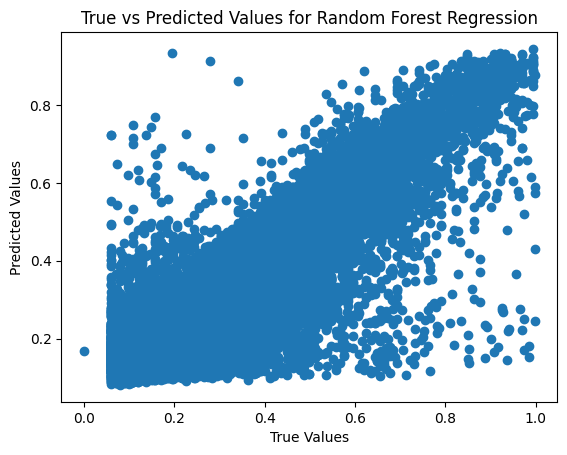

R^2 (train) :  0.9757441165199997
R^2 (test) :  0.8251328490888747
MSE (train):  0.0004170637032341889
MSE (test):  0.0029901794710408365
RMSE (train):  0.02042213757749636
RMSE (test):  0.054682533509712555


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
def RandomForestRegressorr(x_train, x_test, y_train, y_test, degree=1, n_estimators=100, random_state=42):
    # poly = PolynomialFeatures(degree=degree)
    # x_train_random = poly.fit_transform(x_train)
    # x_test_random= poly.transform(x_test)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
    RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values for Random Forest Regression')
    plt.show()
    return r2_train, r2_test, RMSE_train, RMSE_test,model
print("Random forest")
r2_train, r2_test, RMSE_train, RMSE_test,model = RandomForestRegressorr(x_train,x_test,y_train,y_test)
print("R^2 (train) : ", r2_train)
print("R^2 (test) : ", r2_test)
print("MSE (train): ", RMSE_train**2)
print("MSE (test): ", RMSE_test**2)
print("RMSE (train): ", RMSE_train)
print("RMSE (test): ", RMSE_test)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
model.predict([[2,-11,-1,1,1,4,1,2,3,1,1,1,1,2,1,1,4,3,5,0,0,1]])[0]*42

c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


18.97982964224872

In [69]:

from sklearn.pipeline import Pipeline
pipline = Pipeline([
    ("minmax",MinMaxScaler()),
    ("Xgb",RandomForestRegressor(n_estimators=100,random_state=42,))
])

In [70]:
pipline.fit(x_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('Xgb', RandomForestRegressor(random_state=42))])

In [74]:
import pickle
pickle.dump(pipline,open('../savedModels/model.pkl', 'wb'))

In [35]:
# import pickle
# # pickle.dump(model,open('../savedModels/model2.pkl', 'wb'))
# with open('../savedModels/model2.pkl', 'wb') as f:
#     pickle.dump((scaler, model), f)

In [ ]:
#model4 used all features without scaling the input back
#model2 used all features with scaling the input back
#model used only the best 10 features